<h1><center><font size="6"> Credit Card Fraud Detection </font></center></h1>
<h3><center><font size="4"> https://www.kaggle.com/mlg-ulb/creditcardfraud </font></center></h3>
    

## Table of Contents

1. [Introduction](#1)

1. [Initialization](#2)
    1. [Load Packages](#21)
    1. [Define Metadata](#22)
1. [Load Data](#3)
1. [Data Insights](#4)
    1. [Data Structure](#41)
    1. [Summary Stats](#42)
    1. [Unique Value Checking](#43)
    1. [Identifying 'Bad Columns'](#44)
    
1. [Data Cleansing](#5)
    1. [Data Reduction](#51)
    1. [Data Type Conversion](#52)
    1. [Data Encoding](#53)
1. [Modelling Workflow](#6)
    1. [Data Prep](#61)
    1. [Class Distributions](#62)
    1. [Prediction Modelling](#63)
    1. [Performance Metrics](#64)
    1. [Visualize Class Separation](#65)
    

# <a id = '1'> Introduction

     It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

* The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
* The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
    * Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification. <br>
    

* It contains only numerical input variables which are the result of a PCA transformation. 
    * Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA.


* The only features which have not been transformed with PCA are 'Time' and 'Amount'. 
    * Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
    * Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
    * Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.*




# <a id='2'> Initialization


### <a id='21'> Load Packages 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


### <a id='22'> Define Metadata

In [21]:
target_class_name = 'Class'
labels = ['Non-Fraud', 'Fraud']

input_file_name = 'creditcard.csv'
intermediate_data_path = '../data/intermediate'
output_df_file_name = 'day1_cleaned_df_output'

export_date = '20210509'

import sys
sys.path.append('C:\\Users\\A.LIU\\Desktop\\学习\\Credit Card Fraud Detection')

In [3]:
#check the names of the imput files that we need to import
import os
print(os.listdir('../data/raw'))

['creditcard.csv']


# <a id='3'>Load Data

In [9]:
df = pd.read_csv('../data/raw/' + input_file_name)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199140,132825.0,2.023205,0.085635,-1.836450,0.344280,0.336948,-0.944927,0.103801,-0.161527,0.462738,...,0.224702,0.755916,-0.060221,-0.479108,0.226302,-0.093245,-0.008687,-0.046311,5.99,0
127578,78382.0,-1.802160,-1.639632,1.031197,1.630680,-2.164741,0.898454,2.458265,-0.021194,-0.455801,...,0.859925,1.127562,1.720274,0.320717,-0.206127,-0.217514,-0.051876,0.236088,756.00,0
210093,137838.0,-0.464652,0.240040,0.463776,-0.724800,0.469596,1.475694,-0.206430,0.640174,1.128946,...,0.319579,1.397553,0.105284,-1.420916,-0.993283,0.629290,0.370343,0.183209,31.68,0
83645,59957.0,-1.603307,-0.739779,1.468777,-1.453165,-0.509103,-0.434681,-0.383528,0.600306,-1.366590,...,-0.483181,-1.472074,0.224356,-0.005407,-0.243273,0.563821,-0.122876,-0.105849,95.00,0
24021,33030.0,-1.503508,-1.648787,1.577280,-1.467704,-0.464802,-0.109634,-0.031040,-0.127108,-0.605568,...,0.288587,1.640765,0.871677,0.041266,-0.110713,-0.240459,0.038035,-0.409837,134.99,0


    Check head & tail to make sure there are unwanted headers

In [5]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Both head & tail are clean

# <a id='4'> Data Insights 

## <a id='41'> Data Structure

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

all variables have been pre-processed to be floats

## <a id='42'> Summary Stats

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## <a id='43'> Unique Value Checking

In [9]:
for column in df.columns:
    print(column, len(df[column].unique()))

Time 124592
V1 275663
V2 275663
V3 275663
V4 275663
V5 275663
V6 275663
V7 275663
V8 275663
V9 275663
V10 275663
V11 275663
V12 275663
V13 275663
V14 275663
V15 275663
V16 275663
V17 275663
V18 275663
V19 275663
V20 275663
V21 275663
V22 275663
V23 275663
V24 275663
V25 275663
V26 275663
V27 275663
V28 275663
Amount 32767
Class 2


V1-28 are continuous variables
<br>Amount is distinct variable
<br>Class has two values: 0, 1

## <a id='44'> Identifying 'Bad Columns'

In [22]:
from helper_functions_comprehensive import find_bad_columns_function

null_col_list, blank_space_list, constant_numeric_col_list, \
constant_non_numeric_col_list, duplicate_col_list = find_bad_columns_function(df)

Identified 0 features with atleast one null
Identified 0 features with atleast one blank space
Identified 0 numeric features that have quasi-constant values
Identified 0 non-numeric features that have quasi-constant values
Identified 0 features that are duplicates of other features


# <a id='5'> Data Cleansing
    

## <a id='51'> Data Reduction

**Dropping Bad Column**

delete duplicated columns & near constant records
* not shown in this dataset

**Null Value Removal**

delete null records
* not shown in this dataset

## <a id='52'> Data Type Conversion

convert the data types to be needed
* not necessary in this dataset

## <a id='53'> Data Encoding

encode Object columns to be numerical
* already down in this dataset

**Export processed data for future iterations**

* no need because no cleaning was done

# <a id='6'> Modelling Workflow </a> 

## <a id='61'> Data Prep</a> 

**Normalize Numerical Variables**

_Scaling can squeeze all data range into a tight range_
* not required for Tree-based models

**Split Target Feature**

In [10]:
X = df.drop(target_class_name, axis = 1)
    #axis=1: drop column
y = df[target_class_name]

**Split Train & Test Sets**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

## <a id='62'> Class Distribution
_distribution percentage is an estimate of baseline accuracy_

In [12]:
print('Non-fraud class takes {}%'.format(
    round(df[target_class_name].value_counts()[0]/len(df)*100,3)))
print('Fraud class takes {}%'.format(
    round(df[target_class_name].value_counts()[1]/len(df)*100,3)))

Non-fraud class takes 99.827%
Fraud class takes 0.173%


* The baseline accuracy to beat would be 99.8%

0    284315
1       492
Name: Class, dtype: int64

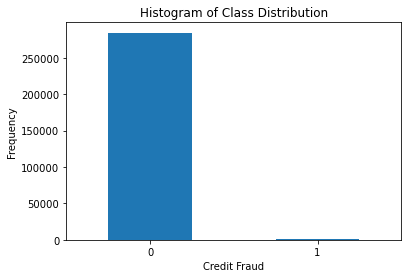

In [13]:
plt.figure(figsize = (6,4))
pd.value_counts(df[target_class_name]).plot.bar()

plt.title('Histogram of Class Distribution')
plt.xlabel('Credit Fraud')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

df[target_class_name].value_counts()

## <a id='63'> Predictive Modelling

**Fit Random Forest Model**

In [14]:
from sklearn.ensemble import RandomForestClassifier

#initialize a default classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## <a id='64'> Performance Matrix

Has a Train accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    227451
       Fraud       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

The ROC AUC Score on Train set is 1.0
Confusion matrix, without normalization
[[227451      0]
 [     0    394]]


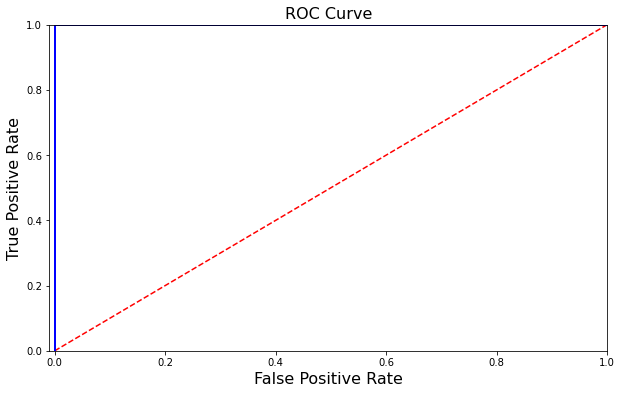

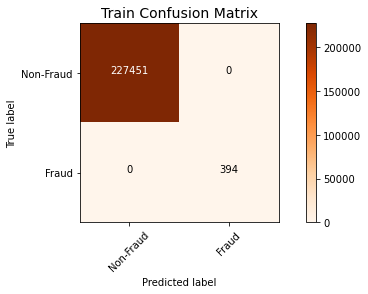

In [15]:
from helper_functions_comprehensive import custom_classification_metrics_function
custom_classification_metrics_function(X_train, y_train, labels, classifier, data_type='Train')

Has a Test accuracy of 100.0 % 
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

The ROC AUC Score on Test set is 0.96
Confusion matrix, without normalization
[[56859     5]
 [   18    80]]


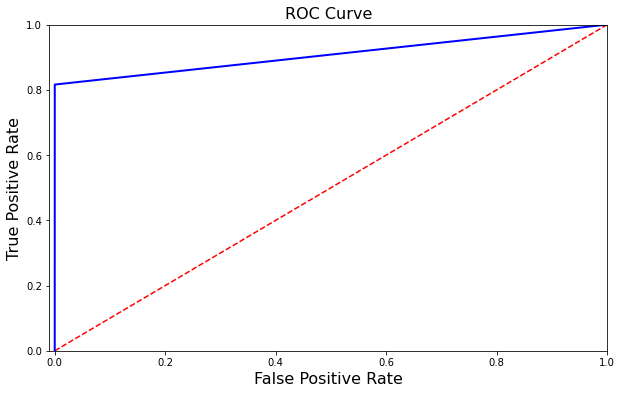

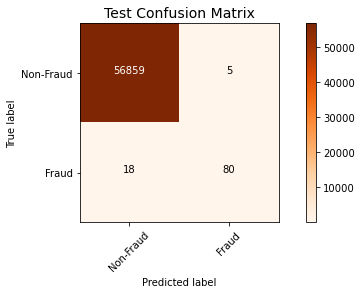

In [18]:
custom_classification_metrics_function(X_test, y_test, labels, classifier, data_type='Test')

For inbalanced datasets, we use precision mnumber as a good metric to compare performance across different models

In [23]:
from helper_functions_comprehensive import precision_at_recall_threshold_function

predicted_proba = classifier.predict_proba(X_test)[:,1]
precision_at_recall_threshold_function(y_test, predicted_proba, recall_threshold=0.85)

0.9333333333333333

## <a id='65'> Visualize Class Separaion

In [ ]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='blue', label=labels[0])
red_patch = mpatches.Patch(color='red', label = labels[1])

In [ ]:
#t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1],
           c=(y==0), cmap='coolwarm',label=labels[0],linewidths=2)